In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
import pandas as pd

In [2]:
faces_quantity = 50

In [3]:
data = fetch_olivetti_faces()
labels = data.target[:faces_quantity]
data_faces = data.images[:faces_quantity]

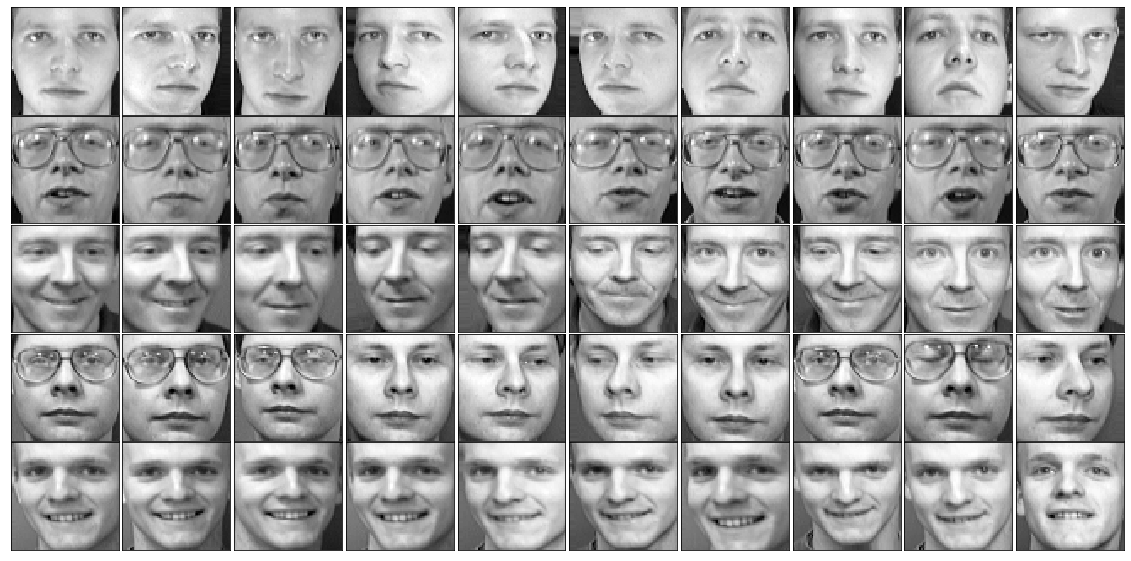

In [4]:
faces = pd.DataFrame([])
for i in range(faces_quantity):
    img=data_faces[i]
    label=labels[i]
    face = pd.Series(img.flatten(),name=label)
    faces = faces.append(face)

    
fig, axes = plt.subplots(faces_quantity//10,10,figsize=(20,10),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(64,64),cmap='gray')

Twarze testowe

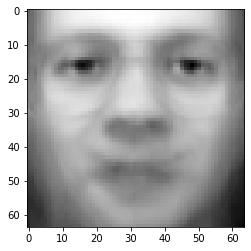

In [5]:
plt.imshow(np.mean(faces,axis=0).values.reshape(64,64),cmap='gray')

Średnia twarz

In [6]:
n=[5,14,50]
n_components=5

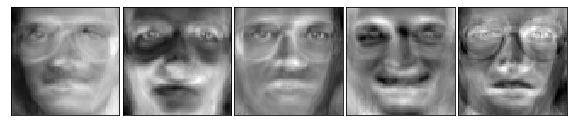

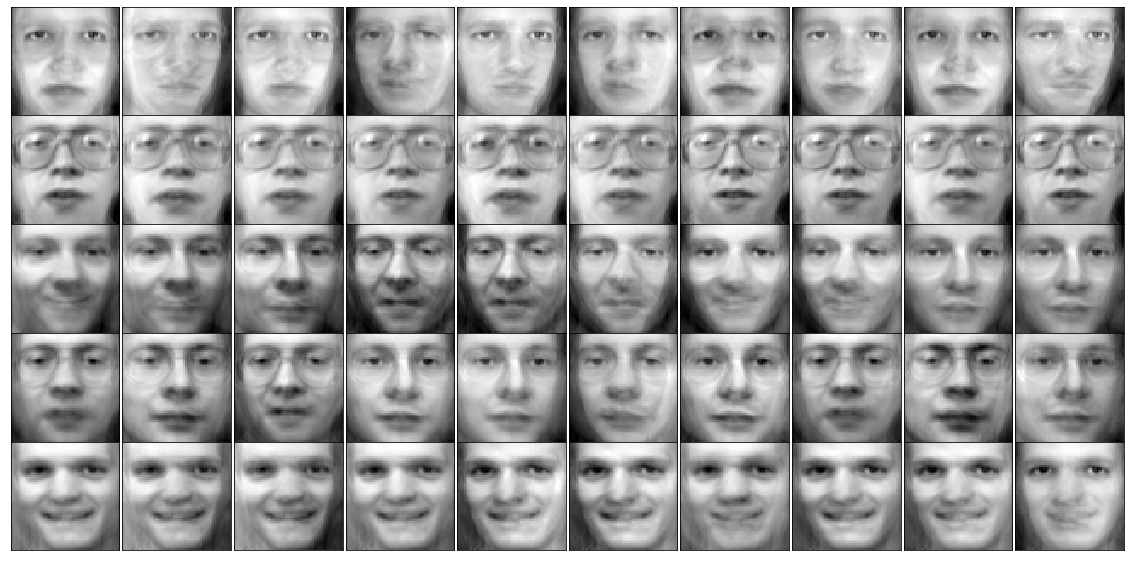

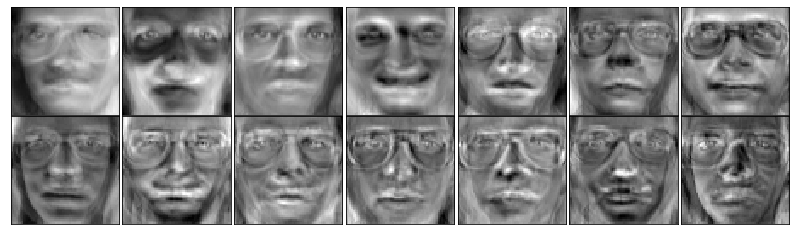

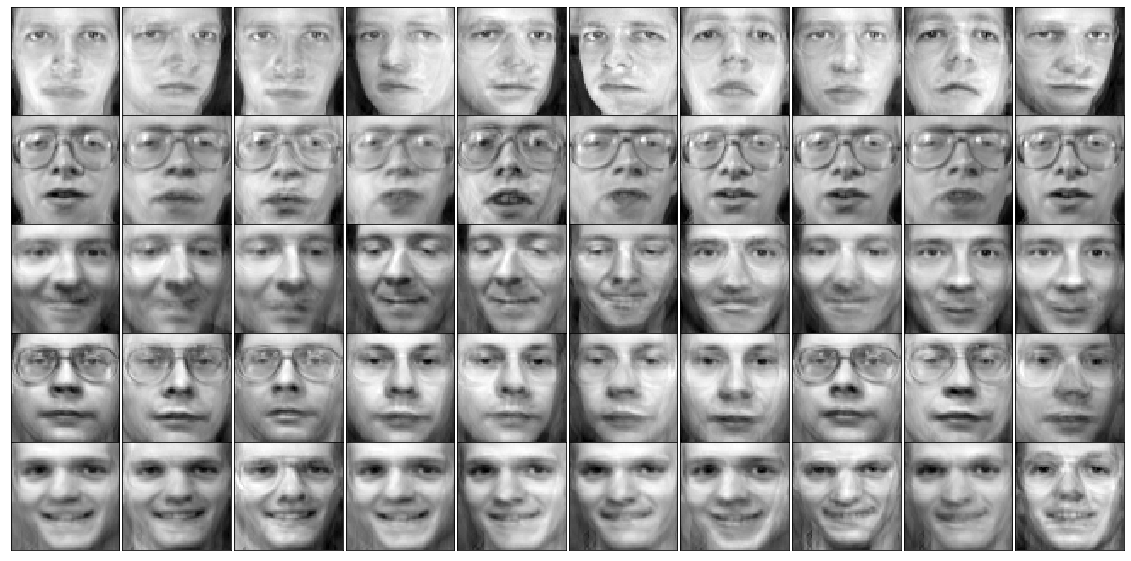

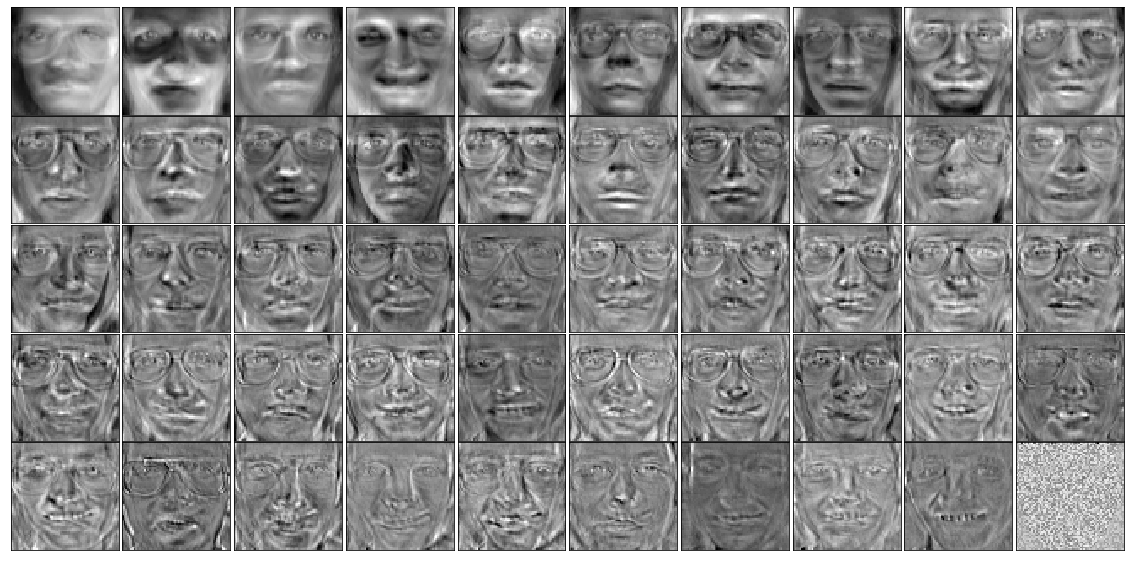

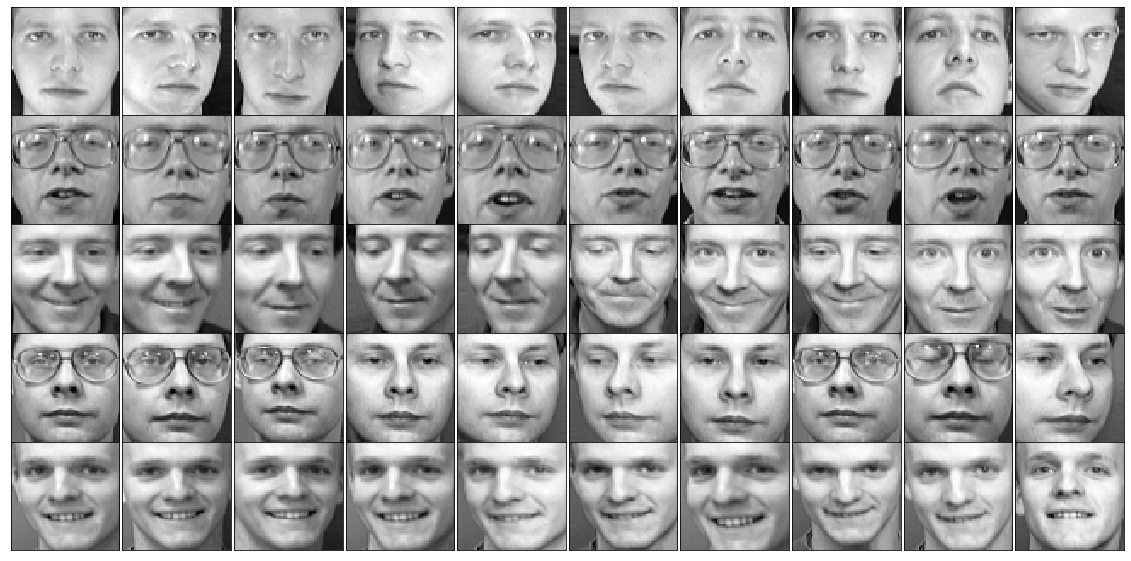

In [7]:
for n_components in n:
    pca = PCA(n_components=n_components)
    pca.fit(faces)
    components = pca.transform(faces)
    projected = pca.inverse_transform(components)

    columns = n_components//11 + 1
    rows = n_components//columns
    fig, axes = plt.subplots(columns,rows,figsize=(2*rows,2*columns),
     subplot_kw={'xticks':[], 'yticks':[]},
     gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64,64),cmap='gray')

    fig, axes = plt.subplots(faces_quantity//10,10,figsize=(20,10), subplot_kw={'xticks':[], 'yticks':[]},
                gridspec_kw=dict(hspace=0.001, wspace=0.001))
    for i, ax in enumerate(axes.flat):
        ax.imshow(projected[i].reshape(64,64),cmap='gray')

Składowe i twarze z nich odtworzone

In [8]:
cord_color=np.array(['b','r','g','y','m'])
pca = PCA(n_components=2)
pca.fit(faces)
components = pca.transform(faces)

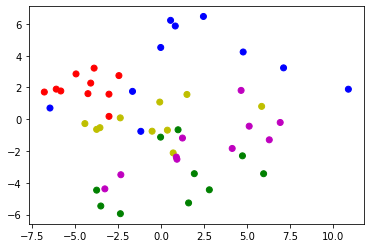

In [9]:
plt.scatter(components[:,0],components[:,1],color=cord_color[labels])

Pixele 2 najważniejszych składowych, nie ma w nich żadnych bardzo wyraźnych grup, są mniejwiecej wymieszane, z pominięciem czerwonych

In [49]:
pca = SparsePCA(n_components=2,normalize_components=True)
pca.fit(faces)
components = pca.transform(faces)

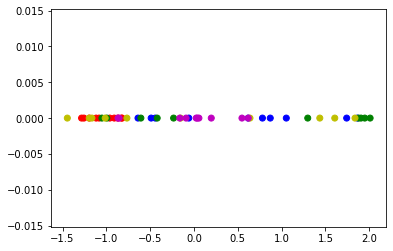

In [50]:
plt.scatter(components[:,0],components[:,1],color=cord_color[labels])

Sparse pca natomaist wybrało pixele w sposób dużo bardzoe zoorganizowany